## PD_MIT-CS1PD dataset

### Ground truth loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nqDataLoader as nq  #data loading library

In [2]:
# load ground Ground Truth 
cs1PdFr = pd.read_csv( 'MIT-CS1PD/GT_DataPD_MIT-CS1PD.csv' )
# set Patient ID as index
cs1PdFr = cs1PdFr.set_index('pID')

In [3]:
# show part of Data Frame
cs1PdFr.head()
# cs1PdFr[cs1PdFr['gt'] == 0].shape

,gt,updrs108,afTap,sTap,nqScore,typingSpeed,file_1,file_2
pID,,,,,,,,
11,True,14.25,NaN,162.25,0.117543,189.372549,1402930351.011_001_014.csv,1403706430.011_003_014.csv
60,False,2.00,NaN,162.25,0.070350,60.533333,1402932300.060_001_014.csv,1403708258.060_003_014.csv
67,True,25.25,NaN,133.75,0.223411,54.333333,1401117235.067_001_014.csv,1401978395.067_003_014.csv
68,False,6.00,NaN,159.00,0.074973,71.800000,1401114972.068_001_014.csv,1401980765.068_003_014.csv
70,True,26.25,NaN,113.50,0.175751,39.614035,1404311419.070_001_014.csv,1404743687.070_003_014.csv


In [4]:
# load typing data for patient 60 (first repetition)
# this method automatically filters out meta keys, mouse presses and backspace
keyPressed, htArr, pressArr, releaseArr = \
            nq.getDataFiltHelper( 'MIT-CS1PD/data_MIT-CS1PD/' + cs1PdFr.loc[68]['file_2'])

<function matplotlib.pyplot.show>

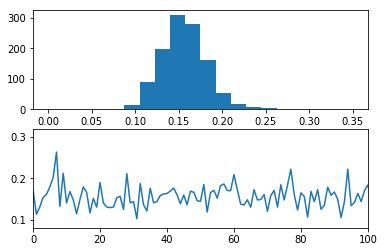

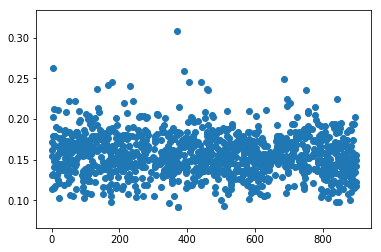

In [5]:

fig1, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)

# plt.subplot(211)
ax1.hist(htArr, bins=20, range=(0, 0.35))
# plt.show

# plt.subplot(212)
axes = plt.gca()
axes.set_xlim([0,100])
# axes.set_ylim([ymin,ymax])
ax2.plot(htArr)

fig2, ax3 = plt.subplots(1, 1)
ax3.scatter(pressArr, htArr)

plt.show


In [6]:
print(pd.Series(keyPressed)[:10])  #.strip('\"'))

0        "a"
1    "space"
2        "p"
3        "o"
4        "s"
5        "a"
6        "d"
7        "e"
8        "r"
9        "a"
dtype: object


In [7]:
tmp = pd.Series(keyPressed)
tmp = tmp.apply(lambda x: x.replace('"', ''))
# tmp[tmp == 'E']
tmp[285:295]
# 290    E
# 377    E
# 420    E
# 486    E
# 603    E


285         n
286         e
287         r
288         o
289    period
290         E
291         n
292         t
293         o
294         n
dtype: object

### Load all the files

In [8]:
# load ground Ground Truth 
cs2PdFr = pd.read_csv( 'MIT-CS2PD/GT_DataPD_MIT-CS2PD.csv' )
# set Patient ID as index
cs2PdFr = cs2PdFr.set_index('pID')
# show part of Data Frame
# cs2PdFr.head()

In [9]:
filenames = ['file_1', 'file_2']
patients = pd.DataFrame(columns=['id', 'data', 'label'])
def load_all(record):
    global filenames, patients
    name = record.name
    
    arr = np.empty(shape=(0, 0))
    keyp = pd.Series()
    for filename in filenames:
        keyPressed, htArr, pressArr, releaseArr = \
                nq.getDataFiltHelper( 'MIT-CS1PD/data_MIT-CS1PD/' + cs1PdFr.loc[name][filename])
        arr = np.append(arr, htArr)
        keyp = keyp.append(pd.Series(keyPressed))
        
    patients = patients.append({'id': name, 'data': arr, 'key': keyp, 'label': record['gt']}, ignore_index=True)
    return True

def load_all_d2(record):
    global patients
    filenames = ['file_1']
    name = record.name
    
    arr = np.empty(shape=(0, 0))
    keyp = pd.Series()
    for filename in filenames:
        keyPressed, htArr, pressArr, releaseArr = \
                nq.getDataFiltHelper( 'MIT-CS2PD/data_MIT-CS2PD/' + cs2PdFr.loc[name][filename])
        arr = np.append(arr, htArr)
        keyp = keyp.append(pd.Series(keyPressed))
        
    patients = patients.append({'id': name, 'data': arr, 'key': keyp, 'label': record['gt']}, ignore_index=True)
    return True

def remove_quotes(row):    
    return list(row.apply(lambda x: x.replace('"', '')))

    
tmp = cs1PdFr.apply(lambda x: load_all(x), axis=1)
tmp = cs2PdFr.apply(lambda x: load_all_d2(x), axis=1)

patients.set_index('id', inplace=True)

patients['key'] = patients['key'].apply(lambda x: remove_quotes(x))

### Map key to row

In [10]:
keyss = set()

def add_to_set(row):
    global keyss
    keyss.update(row)
tmp = patients['key'].apply(lambda x: add_to_set(x))
# patients.head()


In [11]:
keyss

{'',
 '0',
 '1',
 '2',
 '3',
 '4',
 '6',
 '9',
 'A',
 'B',
 'C',
 'Caps_Lock',
 'D',
 'Delete',
 'Down',
 'E',
 'End',
 'Escape',
 'F',
 'G',
 'H',
 'I',
 'Insert',
 'J',
 'L',
 'Left',
 'M',
 'Menu',
 'N',
 'Num_Lock',
 'O',
 'P',
 'P_Add',
 'P_Down',
 'P_End',
 'P_Enter',
 'P_Home',
 'P_Insert',
 'P_Left',
 'P_Next',
 'P_Page_Up',
 'P_Subtract',
 'Q',
 'R',
 'Return',
 'Right',
 'S',
 'Super_L',
 'T',
 'Tab',
 'U',
 'Up',
 'V',
 'W',
 'Y',
 'Z',
 '[269025200]',
 '[269025201]',
 '[65027]',
 '[65104]',
 '[65105]',
 'a',
 'acute',
 'apostrophe',
 'b',
 'c',
 'ccedilla',
 'colon',
 'comma',
 'd',
 'e',
 'exclam',
 'exclamdown',
 'f',
 'g',
 'grave',
 'h',
 'i',
 'j',
 'k',
 'l',
 'less',
 'm',
 'masculine',
 'minus',
 'n',
 'ntilde',
 'o',
 'p',
 'parenleft',
 'parenright',
 'period',
 'periodcentered',
 'plus',
 'q',
 'question',
 'quotedbl',
 'r',
 's',
 'semicolon',
 'space',
 't',
 'u',
 'underscore',
 'v',
 'w',
 'x',
 'y',
 'z'}

In [33]:
# cs1PdFr.iloc[0].name
keyboard = {0: ['Escape', '[269025200]', '[269025201]', '[65027]', '[65104]', '[65105]', ''],
            1: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '0', 'masculine', 'exclam', 'exclamdown', 'question', 'apostrophe', 'Insert', 'Num_Lock', 'P_Subtract'], 
            2: ['q', 'w', 'e', 'r', 't', 'y', 'u', 'i', 'o', 'p', 'Q', 'W', 'E', 'R', 'T', 'Y', 'U', 'I', 'O', 'P', 'Tab', 'grave', 'plus', 'Delete', 'End', 'P_Add', 'P_Home', 'P_Page_Up'], 
            3: ['a', 's', 'd', 'f', 'g', 'h', 'j', 'k', 'l', 'A', 'S', 'D', 'F', 'G', 'H', 'J', 'K', 'L', 'Caps_Lock', 'ntilde', 'parenleft', 'parenright', 'acute', 'ccedilla', 'quotedbl', 'P_Left', 'Return'], 
            4: ['z', 'x', 'c', 'v', 'b', 'n', 'm', 'Z', 'X', 'C', 'V', 'B', 'N', 'M', 'less', 'colon', 'semicolon', 'period', 'periodcentered', 'comma', 'minus', 'underscore', 'Up', 'P_End', 'P_Down', 'P_Enter', 'P_Next'], 
            5: ['space', 'Super_L', 'Left', 'Menu', 'Down', 'Right', 'P_Insert']}

# patients.head()

In [34]:
def digList(lst):
    temp = []
    for item in lst:
        if type(item) is list:
            temp.append(digList(item))
        else:
            temp.append(item)
    return set(temp)

invDict = {}
for k, v in keyboard.items():
    if type(v) is list:
        items = digList(v)
        for item in items:
            invDict[item] = invDict.get(item, [])
            invDict[item].append(k)
    else:
        invDict[v] = invDict.get(v, [])
        invDict[v].append(k)

keyboard_inv = invDict

In [38]:

def key_to_row(value):
    return keyboard_inv[value][0]

def add_rows(row):
    pd.Series(row).apply(lambda x: key_to_row(x))
    return list(pd.Series(row).apply(lambda x: key_to_row(x)))

patients['row'] = patients['key'].apply(lambda x: add_rows(x))

# patients.head()
# keyboard.values()

In [39]:
patients.head()

,data,label,key,row
id,,,,
11,"[0.1713, 0.1432, 0.0655, 0.1188, 0.0737, 0.065...",True,"[a, b, i, a, space, u, n, a, space, v, e, a, s...","[3, 4, 2, 3, 5, 2, 4, 3, 5, 4, 2, 3, 5, 2, 2, ..."
60,"[0.0895, 0.0954, 0.1738, 0.1078, 0.166, 0.1361...",False,"[d, e, l, space, e, n, f, a, d, o, space, l, e...","[3, 2, 3, 5, 2, 4, 3, 3, 3, 2, 5, 3, 2, 5, 2, ..."
67,"[0.1119, 0.1345, 0.3396, 0.1883, 0.1592, 0.134...",True,"[f, u, e, space, r, e, c, o, g, i, d, o, space...","[3, 2, 2, 5, 2, 2, 4, 2, 3, 2, 3, 2, 5, 3, 2, ..."
68,"[0.1194, 0.1337, 0.1847, 0.1499, 0.2137, 0.164...",False,"[n, t, e, r, o, comma, space, q, u, e, space, ...","[4, 2, 2, 2, 2, 4, 5, 2, 2, 2, 5, 4, 2, 2, 5, ..."
70,"[0.1528, 0.208, 0.2084, 0.1539, 0.177, 0.2055,...",True,"[period, l, a, space, p, s, a, d, e, r, a, spa...","[4, 3, 3, 5, 2, 3, 3, 3, 2, 2, 3, 5, 2, 2, 2, ..."


### Average hold time

In [99]:
def calc_ave(record):
    return record.mean()

def calc_std(record):
    return record.std()

# control['ave_hold_time'] = control['data'].apply(lambda x: calc_ave(x))
# parkinson['ave_hold_time'] = parkinson['data'].apply(lambda x: calc_ave(x))

# control['std_hold_time'] = control['data'].apply(lambda x: calc_std(x))
# parkinson['std_hold_time'] = parkinson['data'].apply(lambda x: calc_std(x))

patients['ave_hold_time'] = patients['data'].apply(lambda x: calc_ave(x))
patients['std_hold_time'] = patients['data'].apply(lambda x: calc_std(x))

In [100]:
control = patients[patients['label'] == False]
parkinson = patients[patients['label'] == True]


<function matplotlib.pyplot.show>

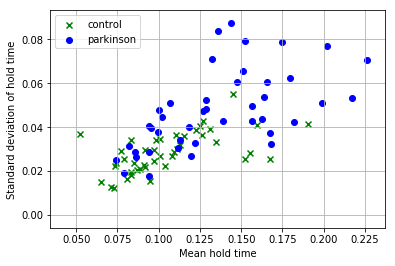

In [101]:
fig1, ax1 = plt.subplots(1, 1)
ax1.scatter(control['ave_hold_time'], control['std_hold_time'], c='g', marker='x', label='control')
ax1.scatter(parkinson['ave_hold_time'], parkinson['std_hold_time'], c='b', marker='o', label='parkinson')

# ax1.title("")
plt.xlabel("Mean hold time")
plt.ylabel("Standard deviation of hold time")
ax1.legend()
ax1.grid()

plt.show

In [271]:
from sklearn.model_selection import train_test_split

shuffle = patients.sample(frac=1)

X_train = shuffle[['ave_hold_time', 'std_hold_time']].values
# X_train = np.stack(X_train)
# normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

Y_train = shuffle['label']
Y_train = Y_train.astype(int)

X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.3, random_state=42)

In [272]:
# train simple SVM
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train, Y_train)

# res = cross_val_score(svm, X_train, Y_train, cv=7)
# print(res)
# print('Mean accuracy:', np.mean(res))

roc_auc_score(Y_test, svm.predict_proba(X_test)[:,1])

0.8928571428571429

### LDA

In [273]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

lda.fit(X_train, Y_train)

roc_auc_score(Y_test, lda.predict_proba(X_test)[:,1])

0.91666666666666663

### Check for autocorrelations

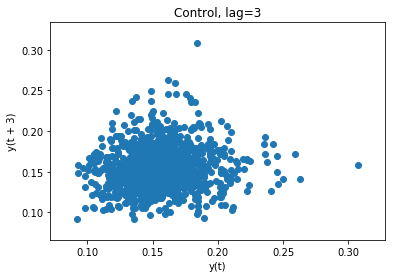

In [286]:
from pandas import Series, DataFrame, concat
from matplotlib import pyplot
from pandas.plotting import lag_plot
series = Series(htArr)
lag_plot(series, lag=3)
plt.title('Control, lag=3')
pyplot.show()
# according to the lag plot
# 67 - no outliers (not a Parkinson's)  NO
# 94 - no outliers                      YES
# 11 - outliers (Parkinson's)           YES
# 95 - not a Parkinson's                YES
# 97 - outliers again (Parkinson's)     YES
# 98 - no outliers (not a Parkinson's)  NO
# 99 - no outliers (not a Parkinson's)  YES

### Check the correlation coefficient

In [287]:
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't']
result = dataframe.corr()
print(result)

          t-1         t
t-1  1.000000 -0.003696
t   -0.003696  1.000000


### Autocorrelation plot

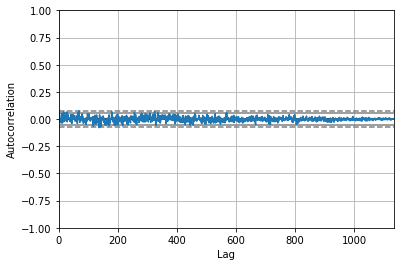

In [10]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
pyplot.show()

### Apply AR model and estimate its parameters

In [291]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
# split dataset
X = series.values
# train autoregression .select_order
model = AR(X)
model_fit = model.fit()
window = model_fit.k_ar
coefs = model_fit.params

print('Number of AR coefs:', len(coefs))
print(coefs)

('Number of AR coefs:', 23)
[ 0.11432176 -0.01393206  0.07932676  0.09075556  0.00332487 -0.01129646
 -0.01755381 -0.01625498 -0.00264115 -0.05029984  0.04270762  0.06564257
  0.06128302 -0.05755648 -0.03673623  0.00649632  0.0409281   0.06980399
 -0.03206254  0.00700546  0.04992112 -0.00580597 -0.00643981]


In [292]:
def apply_AR(record):
    model = AR(record)
#     print(len(record))
    model_fit = model.fit(maxlag=23)
    coefs = model_fit.params
#     print(coefs.shape)
    return coefs

patients['ar_features'] = patients['data'].apply(lambda x: apply_AR(x))

In [13]:
patients.head()

,id,data,label,ar_features
0,11,"[0.1713, 0.1432, 0.0655, 0.1188, 0.0737, 0.065...",True,"[0.112227280788, -0.109343826347, -0.020393126..."
1,60,"[0.0895, 0.0954, 0.1738, 0.1078, 0.166, 0.1361...",False,"[0.0764671428772, 0.0540731274847, 0.018608272..."
2,67,"[0.1119, 0.1345, 0.3396, 0.1883, 0.1592, 0.134...",True,"[0.0774827447219, 0.0602014741146, 0.098911001..."
3,68,"[0.1194, 0.1337, 0.1847, 0.1499, 0.2137, 0.164...",False,"[0.0655440321511, 0.00031467233261, 0.06187900..."
4,70,"[0.1528, 0.208, 0.2084, 0.1539, 0.177, 0.2055,...",True,"[0.140633938112, 0.0667969610725, 0.0392714784..."


### Run SVM

In [314]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

shuffle = patients.sample(frac=1)

X_train = shuffle['ar_features'].values
X_train = np.stack(X_train)
# normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

Y_train = shuffle['label']
Y_train = Y_train.astype(int)

X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.15, random_state=42)

# svm = SVC(kernel='poly')

# res = cross_val_score(svm, X_train, Y_train, cv=8)
# print(res)
# print('Mean accuracy:', np.mean(res))

svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train, Y_train)



# res = cross_val_score(svm, X_train, Y_train, cv=7)
# print(res)
# print('Mean accuracy:', np.mean(res))

roc_auc_score(Y_test, svm.predict_proba(X_test)[:,1])

0.32142857142857145

### Apply ARIMA model

In [15]:
from statsmodels.tsa.arima_model import ARIMA
# fit model
# order = (p, d, q)
p = 6  #: The number of lag observations included in the model, also called the lag order.
d = 0  #: The number of times that the raw observations are differenced, also called the degree of differencing.
q = 5  #: The size of the moving average window, also called the order of moving average.

model = ARIMA(series, order=(p, d, q))
model_fit = model.fit(disp=1)
coefs = model_fit.params
print(coefs)

# print(model_fit.summary())
# plot residual errors
# residuals = DataFrame(model_fit.resid)
# residuals.plot()
# pyplot.show()
# residuals.plot(kind='kde')
# pyplot.show()
# print(residuals.describe())

const      0.155844
ar.L1.y    0.251834
ar.L2.y    1.385355
ar.L3.y   -1.036949
ar.L4.y   -0.480542
ar.L5.y    0.805568
ar.L6.y    0.037613
ma.L1.y   -0.258726
ma.L2.y   -1.336854
ma.L3.y    1.120363
ma.L4.y    0.411727
ma.L5.y   -0.863593
dtype: float64


/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [18]:
p = 6  #: The number of lag observations included in the model, also called the lag order.
d = 0  #: The number of times that the raw observations are differenced, also called the degree of differencing.
q = 5  #: The size of the moving average window, also called the order of moving average.

def apply_ARIMA(record):
    global p, d, q, coefs
    model = ARIMA(record, order=(p, d, q))
    model_fit = model.fit(disp=1, start_params=coefs)
    coeffs = model_fit.params
    return coeffs

patients['arima_features'] = patients['data'].apply(lambda x: apply_ARIMA(x))

/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python2.7/dist

ValueError: On entry to DLASCL parameter number 4 had an illegal value

In [19]:
patients.head()

,id,data,label,ar_features
0,11,"[0.1713, 0.1432, 0.0655, 0.1188, 0.0737, 0.065...",True,"[0.112227280788, -0.109343826347, -0.020393126..."
1,60,"[0.0895, 0.0954, 0.1738, 0.1078, 0.166, 0.1361...",False,"[0.0764671428772, 0.0540731274847, 0.018608272..."
2,67,"[0.1119, 0.1345, 0.3396, 0.1883, 0.1592, 0.134...",True,"[0.0774827447219, 0.0602014741146, 0.098911001..."
3,68,"[0.1194, 0.1337, 0.1847, 0.1499, 0.2137, 0.164...",False,"[0.0655440321511, 0.00031467233261, 0.06187900..."
4,70,"[0.1528, 0.208, 0.2084, 0.1539, 0.177, 0.2055,...",True,"[0.140633938112, 0.0667969610725, 0.0392714784..."


## PD_MIT-CS2PD dataset

### Ground truth loading

In [78]:
# load ground Ground Truth 
cs2PdFr = pd.read_csv( 'MIT-CS2PD/GT_DataPD_MIT-CS2PD.csv' )
# set Patient ID as index
cs2PdFr = cs2PdFr.set_index('pID')
# show part of Data Frame
cs2PdFr.head()

,gt,updrs108,afTap,sTap,nqScore,typingSpeed,file_1
pID,,,,,,,
1000,True,27,79.0,184.5,0.107179,56.866667,1424946827.1000_001_014.csv
1001,True,16,96.5,189.0,0.056286,118.000000,1427279751.1001_001_014.csv
1002,False,5,140.0,158.0,0.039519,119.037037,1426676689.1002_001_014.csv
1004,True,22,83.5,191.5,0.034853,74.266667,1429866367.1004_001_014.csv
1005,True,17,68.0,150.0,0.048307,74.969697,1430134526.1005_001_014.csv


In [79]:
# load typing data for patient 1000
# this method automatically filters out meta keys, mouse presses and backspace
keyPressed, htArr, pressArr, releaseArr = \
            nq.getDataFiltHelper( 'MIT-CS2PD/data_MIT-CS2PD/' + cs2PdFr.loc[1000]['file_1'])